[kaggle fruits 360 참고](https://www.kaggle.com/muhammeddalkran/fruit-360-dataset-with-cnn-in-keras)

```
model plan
1. Convolutional layers(CNN), 
2. Maxpooling layers, 
3. Activation layers, 
4. Droupout Layers, 
5. Fully Connected Layers.
```

```
I need to make preprocessing to my data
1. ImageDataGenerator
2. img_to_array => convert image to array
3. load_img => to load image
```

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

# Loading Data

In [3]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 8688, done.
remote: Counting objects: 100% (8688/8688), done.
remote: Compressing objects: 100% (8667/8667), done.
remote: Total 385853 (delta 33), reused 8668 (delta 21), pack-reused 377165
Receiving objects: 100% (385853/385853), 2.10 GiB | 14.04 MiB/s, done.
Resolving deltas: 100% (1193/1193), done.
Checking out files: 100% (90502/90502), done.


In [4]:
# Train and Test Path
train_path = "/content/Fruit-Images-Dataset/Training/"
test_path = "/content/Fruit-Images-Dataset/Test/"

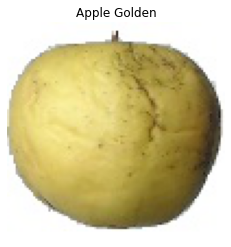

In [5]:
img = load_img(train_path + "Apple Golden 1/0_100.jpg")
plt.imshow(img)
plt.title("Apple Golden")
plt.axis("off")
plt.show()

In [6]:
# Shape of images
shape_of_image = img_to_array(img)
print(shape_of_image.shape)

(100, 100, 3)


In [7]:
# Number of Class
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  131


In [96]:
labels = os.listdir(train_path)
print(labels)

['Lychee', 'Blueberry', 'Peach Flat', 'Apple Red 1', 'Apple Crimson Snow', 'Grape White 4', 'Plum', 'Banana', 'Physalis', 'Pear Stone', 'Apple Granny Smith', 'Cucumber Ripe 2', 'Pomelo Sweetie', 'Cucumber Ripe', 'Strawberry', 'Physalis with Husk', 'Papaya', 'Grapefruit White', 'Tamarillo', 'Potato Red', 'Apple Red Yellow 2', 'Plum 2', 'Nectarine', 'Banana Red', 'Plum 3', 'Cherry 2', 'Corn Husk', 'Tomato not Ripened', 'Limes', 'Ginger Root', 'Melon Piel de Sapo', 'Tomato Cherry Red', 'Orange', 'Potato White', 'Tomato Yellow', 'Huckleberry', 'Avocado', 'Pepino', 'Pear Red', 'Clementine', 'Apple Golden 2', 'Tomato 4', 'Rambutan', 'Avocado ripe', 'Pepper Yellow', 'Apple Red 3', 'Kiwi', 'Mangostan', 'Passion Fruit', 'Pear Williams', 'Corn', 'Mandarine', 'Cauliflower', 'Raspberry', 'Strawberry Wedge', 'Dates', 'Grape White 3', 'Onion White', 'Fig', 'Banana Lady Finger', 'Granadilla', 'Apple Red Yellow 1', 'Apple Pink Lady', 'Hazelnut', 'Apple Red Delicious', 'Salak', 'Apple Red 2', 'Kumquats

# Data Generation - Train and Test

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


# Implemention CNN Module

In [9]:
# initializing model
model = Sequential()

In [10]:
# 3 Convolutional Layers and 3 Max Pooling Layers
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
Total params: 28,640
Trainable params: 28,640
Non-trainable params: 0
____________________________________________________

In [12]:
# Flatten process and Fully Conncected Neural Network
model.add(Flatten())
model.add(Dense(1024,activation='relu'))

In [13]:
# Dropout and Output Layers
model.add(Dropout(0.5))
model.add(Dense(number_of_class,activation = 'softmax'))

In [14]:
# Compiling Our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [15]:
# Batch and its size
batch_size = 32
number_of_batch = 1600 // batch_size

In [16]:
# Fitting Our Model
hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - 27s 545ms/step - loss: 4.8601 - accuracy: 0.0269 - val_loss: 4.4460 - val_accuracy: 0.0600
Epoch 2/100
50/50 [==============================] - 27s 543ms/step - loss: 4.0642 - accuracy: 0.0806 - val_loss: 3.5598 - val_accuracy: 0.1287
Epoch 3/100
50/50 [==============================] - 27s 543ms/step - loss: 3.4003 - accuracy: 0.1494 - val_loss: 2.6920 - val_accuracy: 0.3088
Epoch 4/100
50/50 [==============================] - 27s 542ms/step - loss: 2.7614 - accuracy: 0.2575 - val_loss: 1.9637 - val_accuracy: 0.4837
Epoch 5/100
50/50 [==============================] - 27s 544ms/step - loss: 2.2882 - accuracy: 0.3600 - val_loss: 1.6209 - val_accuracy: 0.5688
Epoch 6/100
50/50 [==============================] - 29s 571ms/step - loss: 1.9412 - accuracy: 0.4487 - val_loss: 1.4254 - val_accuracy: 0.5987
Epoch 7/100
50/50 [==============================] - 27s 541

# 모델 저장 및 변환

In [17]:
# Save Model
model.save_weights("trial.h5")
model.save('/content/fruits_model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/fruits_model/assets


In [72]:
# !tar -zcvf fruits_model.tar.gz /content/output_files
from google.colab import files
files.download(f"/content/fruits_model.tar.gz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
%cd /content/

/content


In [48]:
import tensorflow as tf

output_dir = 'output_files'
tf.saved_model.save(model, output_dir)

INFO:tensorflow:Assets written to: output_files/assets


In [49]:
converter = tf.lite.TFLiteConverter.from_saved_model(output_dir)

converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

tflite_model = converter.convert()

In [100]:
import pathlib

tflite_model_file = pathlib.Path('./fruits_model.tflite')
tflite_model_file.write_bytes(tflite_model)

6728880

In [97]:

print(labels)

['Lychee', 'Blueberry', 'Peach Flat', 'Apple Red 1', 'Apple Crimson Snow', 'Grape White 4', 'Plum', 'Banana', 'Physalis', 'Pear Stone', 'Apple Granny Smith', 'Cucumber Ripe 2', 'Pomelo Sweetie', 'Cucumber Ripe', 'Strawberry', 'Physalis with Husk', 'Papaya', 'Grapefruit White', 'Tamarillo', 'Potato Red', 'Apple Red Yellow 2', 'Plum 2', 'Nectarine', 'Banana Red', 'Plum 3', 'Cherry 2', 'Corn Husk', 'Tomato not Ripened', 'Limes', 'Ginger Root', 'Melon Piel de Sapo', 'Tomato Cherry Red', 'Orange', 'Potato White', 'Tomato Yellow', 'Huckleberry', 'Avocado', 'Pepino', 'Pear Red', 'Clementine', 'Apple Golden 2', 'Tomato 4', 'Rambutan', 'Avocado ripe', 'Pepper Yellow', 'Apple Red 3', 'Kiwi', 'Mangostan', 'Passion Fruit', 'Pear Williams', 'Corn', 'Mandarine', 'Cauliflower', 'Raspberry', 'Strawberry Wedge', 'Dates', 'Grape White 3', 'Onion White', 'Fig', 'Banana Lady Finger', 'Granadilla', 'Apple Red Yellow 1', 'Apple Pink Lady', 'Hazelnut', 'Apple Red Delicious', 'Salak', 'Apple Red 2', 'Kumquats

In [105]:
with open("fruits_labels.txt", 'w') as output:
  for row in labels:
    output.write(str(row) + '\n')

In [104]:
%cd /content/tflite-add-metadata

/content/tflite-add-metadata


# 메타데이터 추가

In [61]:
import os

%cd /content
if not os.path.isdir("tflite-add-metadata"):
  !git clone https://github.com/peltraw/tflite-add-metadata.git
%cd tflite-add-metadata/

/content
Cloning into 'tflite-add-metadata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 40 (delta 14), reused 25 (delta 7), pack-reused 0
Unpacking objects: 100% (40/40), done.
/content/tflite-add-metadata


In [62]:
!pip install -r requirements.txt

     |████████████████████████████████| 399kB 2.7MB/s 
  Using cached https://files.pythonhosted.org/packages/89/e3/d576f6f02bc75bacbc3d42494e8f1d063c95617d86648dba243c2cb3963e/pybind11-2.5.0-py2.py3-none-any.whl
  Created wheel for tflite-support: filename=tflite_support-0.1.0a1-cp36-cp36m-linux_x86_64.whl size=3944324 sha256=486531374723d97618af0c0b01f616f8ba9951f9bcb2fc3f42ab31ea04373382
  Stored in directory: /root/.cache/pip/wheels/5f/65/21/4fa08c598c3e79a1a5260646eb37204d4859fc3da0bfeb8011
Successfully built tflite-support


In [73]:
!cp /content/cherry_labels.txt /content/tflite-add-metadata/model/
!cp /content/cherry_model.tflite /content/tflite-add-metadata/model/


In [106]:
#Edit your own model
MODEL_NAME = "fruits"

MODEL_PATH=f"/content/tflite-add-metadata/model/{MODEL_NAME}_model.tflite"
LABEL_PATH=f"/content/tflite-add-metadata/model/{MODEL_NAME}_labels.txt"
EXPORT_PATH="/content/tflite-add-metadata/output/"

if not os.path.isdir(EXPORT_PATH):
  os.makedirs(EXPORT_PATH, exist_ok=True)

if not os.path.exists(MODEL_PATH):
  print(f"Upload your model file in {MODEL_PATH}")

if not os.path.exists(LABEL_PATH):
  print(f"Upload your model file in {LABEL_PATH}")

In [108]:
!pwd

/content/tflite-add-metadata


In [113]:
!python ./model_with_metadata/metadata_writer_for_image_classifier.py \
--model_file={MODEL_PATH} \
--label_file={LABEL_PATH} \
--export_directory={EXPORT_PATH}

2020-08-08 08:15:55.258320: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Finished populating metadata and associated file to the model:
/content/tflite-add-metadata/model/fruits_model.tflite
The metadata json file has been saved to:
/content/tflite-add-metadata/output/fruits_model.json
The associated file that has been been packed to the model is:
['fruits_labels.txt']


In [112]:
%%writefile ./model_with_metadata/metadata_writer_for_image_classifier.py

# Copyright 2020 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Writes metadata and label file to the image classifier models."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

from absl import app
from absl import flags
import tensorflow as tf

import flatbuffers
# pylint: disable=g-direct-tensorflow-import
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb
# pylint: enable=g-direct-tensorflow-import

FLAGS = flags.FLAGS


def define_flags():
  flags.DEFINE_string("model_file", None,
                      "Path and file name to the TFLite model file.")
  flags.DEFINE_string("label_file", None, "Path to the label file.")
  flags.DEFINE_string("export_directory", None,
                      "Path to save the TFLite model files with metadata.")
  flags.mark_flag_as_required("model_file")
  flags.mark_flag_as_required("label_file")
  flags.mark_flag_as_required("export_directory")


class ModelSpecificInfo(object):
  """Holds information that is specificly tied to an image classifier."""

  def __init__(self, name, version, image_width, image_height, image_min,
               image_max, mean, std, num_classes):
    self.name = name
    self.version = version
    self.image_width = image_width
    self.image_height = image_height
    self.image_min = image_min
    self.image_max = image_max
    self.mean = mean
    self.std = std
    self.num_classes = num_classes


_MODEL_INFO = {
    "fruits_model.tflite":
        ModelSpecificInfo(
            name="fruits model",
            version="v1",
            image_width=100,
            image_height=100,
            image_min=0,
            image_max=255,
            mean=[127.5],
            std=[127.5],
            num_classes=131)
}


class MetadataPopulatorForImageClassifier(object):
  """Populates the metadata for an image classifier."""

  def __init__(self, model_file, model_info, label_file_path):
    self.model_file = model_file
    self.model_info = model_info
    self.label_file_path = label_file_path
    self.metadata_buf = None

  def populate(self):
    """Creates metadata and then populates it for an image classifier."""
    self._create_metadata()
    self._populate_metadata()

  def _create_metadata(self):
    """Creates the metadata for an image classifier."""

    # Creates model info.
    model_meta = _metadata_fb.ModelMetadataT()
    model_meta.name = self.model_info.name
    model_meta.description = ("Identify the most prominent object in the "
                              "image from a set of %d categories." %
                              self.model_info.num_classes)
    model_meta.version = self.model_info.version
    model_meta.author = "TensorFlow"
    model_meta.license = ("Apache License. Version 2.0 "
                          "http://www.apache.org/licenses/LICENSE-2.0.")

    # Creates input info.
    input_meta = _metadata_fb.TensorMetadataT()
    input_meta.name = "image"
    input_meta.description = (
        "Input image to be classified. The expected image is {0} x {1}, with "
        "three channels (red, blue, and green) per pixel. Each value in the "
        "tensor is a single byte between {2} and {3}.".format(
            self.model_info.image_width, self.model_info.image_height,
            self.model_info.image_min, self.model_info.image_max))
    input_meta.content = _metadata_fb.ContentT()
    input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
    input_meta.content.contentProperties.colorSpace = (
        _metadata_fb.ColorSpaceType.RGB)
    input_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.ImageProperties)
    input_normalization = _metadata_fb.ProcessUnitT()
    input_normalization.optionsType = (
        _metadata_fb.ProcessUnitOptions.NormalizationOptions)
    input_normalization.options = _metadata_fb.NormalizationOptionsT()
    input_normalization.options.mean = self.model_info.mean
    input_normalization.options.std = self.model_info.std
    input_meta.processUnits = [input_normalization]
    input_stats = _metadata_fb.StatsT()
    input_stats.max = [self.model_info.image_max]
    input_stats.min = [self.model_info.image_min]
    input_meta.stats = input_stats

    # Creates output info.
    output_meta = _metadata_fb.TensorMetadataT()
    output_meta.name = "probability"
    output_meta.description = "Probabilities of the %d labels respectively." % self.model_info.num_classes
    output_meta.content = _metadata_fb.ContentT()
    output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
    output_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.FeatureProperties)
    output_stats = _metadata_fb.StatsT()
    output_stats.max = [1.0]
    output_stats.min = [0.0]
    output_meta.stats = output_stats
    label_file = _metadata_fb.AssociatedFileT()
    label_file.name = os.path.basename(self.label_file_path)
    label_file.description = "Labels for objects that the model can recognize."
    label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
    output_meta.associatedFiles = [label_file]

    # Creates subgraph info.
    subgraph = _metadata_fb.SubGraphMetadataT()
    subgraph.inputTensorMetadata = [input_meta]
    subgraph.outputTensorMetadata = [output_meta]
    model_meta.subgraphMetadata = [subgraph]

    b = flatbuffers.Builder(0)
    b.Finish(
        model_meta.Pack(b),
        _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
    self.metadata_buf = b.Output()

  def _populate_metadata(self):
    """Populates metadata and label file to the model file."""
    populator = _metadata.MetadataPopulator.with_model_file(self.model_file)
    populator.load_metadata_buffer(self.metadata_buf)
    populator.load_associated_files([self.label_file_path])
    populator.populate()


def main(_):
  model_file = FLAGS.model_file
  model_basename = os.path.basename(model_file)
  if model_basename not in _MODEL_INFO:
    raise ValueError(
        "The model info for, {0}, is not defined yet.".format(model_basename))

  export_model_path = os.path.join(FLAGS.export_directory, model_basename)

  # Copies model_file to export_path.
  tf.io.gfile.copy(model_file, export_model_path, overwrite=True)

  # Generate the metadata objects and put them in the model file
  populator = MetadataPopulatorForImageClassifier(
      export_model_path, _MODEL_INFO.get(model_basename), FLAGS.label_file)
  populator.populate()

  # Validate the output model file by reading the metadata and produce
  # a json file with the metadata under the export path
  displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
  export_json_file = os.path.join(FLAGS.export_directory,
                                  os.path.splitext(model_basename)[0] + ".json")
  json_file = displayer.get_metadata_json()
  with open(export_json_file, "w") as f:
    f.write(json_file)

  print("Finished populating metadata and associated file to the model:")
  print(model_file)
  print("The metadata json file has been saved to:")
  print(export_json_file)
  print("The associated file that has been been packed to the model is:")
  print(displayer.get_packed_associated_file_list())


if __name__ == "__main__":
  define_flags()
  app.run(main)

Overwriting ./model_with_metadata/metadata_writer_for_image_classifier.py


In [83]:
!cat ./model_with_metadata/metadata_writer_for_image_classifier.py

# Copyright 2020 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Writes metadata and label file to the image classifier models."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

from absl import app
from absl import flags
import tensorflow as tf

import flatbuffers
# pylint: disable=g-direct-tenso

In [114]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path=f"{EXPORT_PATH}{MODEL_NAME}_model.tflite")
#interpreter = tf.lite.Interpreter('/content/tflite-add-metadata/model/oceania_antarctica.tflite')
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[  1 100 100   3]
<class 'numpy.float32'>
[  1 131]
<class 'numpy.float32'>


In [115]:
from google.colab import files
try: 
  files.download(f"{EXPORT_PATH}{MODEL_NAME}_model.tflite")
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


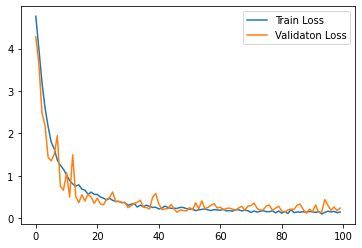

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

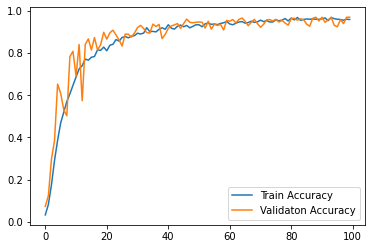

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

In [ ]:
import json
with open("trial.json","w") as f:
    json.dump(hist.history,f)

In [ ]:
import codecs 
with codecs.open("trial.json","r",encoding = "utf-8") as f:
    h = json.loads(f.read())

다른 사이트 참고 

[링크](https://tykimos.github.io/2017/01/27/Keras_Talk/)

In [ ]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
Instructions for updating:
Please use Model.evaluate, which supports generators.
accuracy: 96.25%


In [ ]:
# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
Instructions for updating:
Please use Model.predict, which supports generators.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'G